In [1]:
!pip install tensorflow

In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import GridSearchCV, KFold,train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import preprocessing

In [3]:
Forestfires = pd.read_csv("E:\DS Assignments1\\forestfires (1).csv")

In [4]:
Forestfires

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [5]:
#there are no Null Values in the data
Forestfires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
Duplicate = Forestfires.duplicated()
print('Duplicate Rows: %d' %Duplicate.sum())

Duplicate Rows: 8


In [7]:
print('Rows before Removal of duplicates = %d' % Forestfires.shape[0])

Forestfires = Forestfires.drop_duplicates()
print('Rows after Removal of duplicates = %d' % Forestfires.shape[0])

Rows before Removal of duplicates = 517
Rows after Removal of duplicates = 509


In [8]:
# As month & day variables have dummy columns we'll have to drop it out
Forestfires = Forestfires.drop(['month','day'],axis=1)
Forestfires.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [9]:
Forestfires.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,...,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,90.618075,110.235756,547.787623,9.023576,18.865422,44.253438,4.011395,0.020432,12.992908,0.163065,...,0.017682,0.039293,0.003929,0.062868,0.031434,0.104126,0.003929,0.001965,0.029470,0.337917
std,5.555527,63.804112,248.196222,4.585083,5.841083,16.365192,1.800926,0.296261,64.133357,0.369788,...,0.131921,0.194482,0.062622,0.242965,0.174660,0.305724,0.062622,0.044324,0.169285,0.473466
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,62.300000,437.700000,6.400000,15.400000,32.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.610000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,141.300000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.580000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
Forestfires.shape

(509, 29)

# OBJECTIVE: PREDICT THE BURNED AREA OF FOREST FIRES

In [11]:
Forestfires['size_category'].value_counts()

small    371
large    138
Name: size_category, dtype: int64

In [12]:
Forestfires.loc[Forestfires["size_category"]=='small','size_category']=0
Forestfires.loc[Forestfires["size_category"]=='large','size_category']=1

In [13]:
Forestfires["size_category"].value_counts()

0    371
1    138
Name: size_category, dtype: int64

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FFMC'>

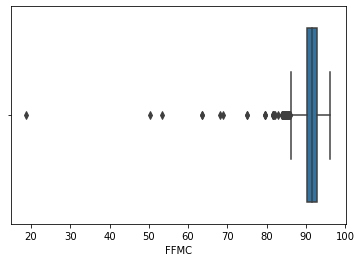

In [14]:
sns.boxplot(Forestfires['FFMC'])

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DMC'>

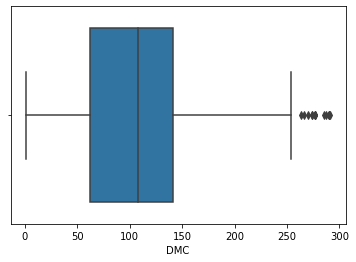

In [15]:
sns.boxplot(Forestfires['DMC'])

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DC'>

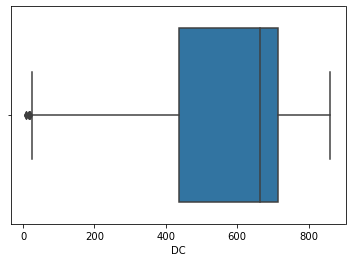

In [16]:
sns.boxplot(Forestfires['DC'])

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ISI'>

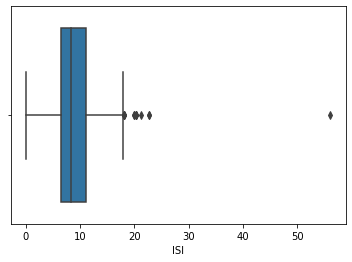

In [17]:
sns.boxplot(Forestfires['ISI'])

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='temp'>

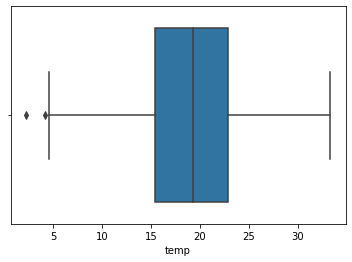

In [18]:
sns.boxplot(Forestfires['temp'])

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RH'>

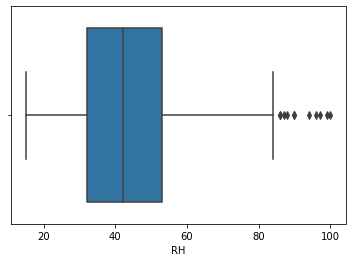

In [19]:
sns.boxplot(Forestfires['RH'])

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wind'>

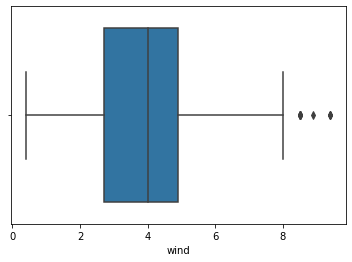

In [20]:
sns.boxplot(Forestfires['wind'])

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rain'>

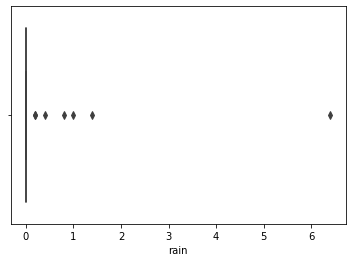

In [21]:
sns.boxplot(Forestfires['rain'])

We observed that in each variables there are few outliers

<AxesSubplot:>

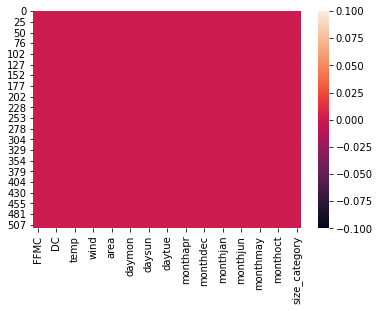

In [22]:
#To check the missing values and correlation
#HEATMAP
sns.heatmap(Forestfires.isnull())

The above heatmap shows that there are no missing values in the dataset

In [23]:
Forestfires.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0


In [24]:
X = Forestfires.drop(["size_category"], axis = 1)
Y = Forestfires['size_category']

# Train and Test

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .3, random_state = 30)

In [26]:
X_train

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
12,63.5,70.8,665.3,0.8,17.0,72,6.7,0.0,0.00,1,...,0,0,0,0,0,0,0,0,0,0
138,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.36,0,...,0,0,0,1,0,0,0,0,0,0
214,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,0,...,0,0,0,0,0,1,0,0,0,0
509,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,1,...,0,0,0,0,0,0,0,0,0,0
305,89.6,84.1,714.3,5.7,19.0,52,2.2,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1
434,90.6,269.8,811.2,5.5,22.2,45,3.6,0.0,0.00,1,...,0,0,0,0,0,0,0,0,0,0
425,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
Y_train

513    1
12     0
138    0
214    1
509    0
      ..
507    0
305    0
434    0
425    0
296    0
Name: size_category, Length: 356, dtype: object

In [28]:
 X_test

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
355,92.1,99.0,745.3,9.6,20.8,35,4.9,0.0,13.06,1,...,0,0,0,0,0,0,0,0,0,1
360,92.5,122.0,789.7,10.2,18.4,42,2.2,0.0,1.09,1,...,0,0,0,0,0,0,0,0,0,1
314,92.6,115.4,777.1,8.8,19.7,41,1.8,0.0,1.58,0,...,0,0,0,0,0,0,0,0,0,1
363,91.9,111.7,770.3,6.5,15.9,53,2.2,0.0,2.93,0,...,0,0,0,0,0,0,0,0,0,1
135,93.5,139.4,594.2,20.3,17.6,52,5.8,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,88.6,69.7,706.8,5.8,20.6,37,1.8,0.0,0.00,1,...,0,0,0,0,0,0,0,0,0,1
245,91.8,175.1,700.7,13.8,26.8,38,6.3,0.0,0.76,0,...,0,0,0,0,0,0,0,0,0,0
194,94.8,108.3,647.1,17.0,24.6,22,4.5,0.0,10.01,0,...,0,0,0,0,0,0,0,0,0,0
185,91.0,129.5,692.6,7.0,17.6,46,3.1,0.0,7.04,0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
Y_test

355    1
360    0
314    0
363    0
135    0
      ..
32     0
245    0
194    1
185    1
277    1
Name: size_category, Length: 153, dtype: object

In [30]:
Y_train = np.array(Y_train)
Y_train

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,

In [31]:
Y_test = np.array(Y_test)
Y_test

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
      dtype=object)

In [32]:
# We'll use min-max scalar
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing data
X_test_norm = norm.transform(X_test)

In [33]:
X_train_norm.shape

(356, 28)

In [34]:
X_test_norm.shape

(153, 28)

In [35]:
Y_train.shape

(356,)

In [36]:
Y_test.shape

(153,)

In [37]:
#We'll use Neural Networks for prediction
# We'll have to use Cross-Validation Analysis as NN requires Hyperparameters
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=28, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [38]:
model = KerasClassifier(build_fn = create_model,verbose = 0)

In [39]:
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,200,400,450]

In [40]:
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)

In [41]:
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)


In [42]:
grid_result = grid.fit(X_train_norm,Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START batch_size=10, epochs=10...................................
[CV 1/5; 1/12] END .................batch_size=10, epochs=10; total time=   0.9s
[CV 2/5; 1/12] START batch_size=10, epochs=10...................................
[CV 2/5; 1/12] END .................batch_size=10, epochs=10; total time=   0.7s
[CV 3/5; 1/12] START batch_size=10, epochs=10...................................
[CV 3/5; 1/12] END .................batch_size=10, epochs=10; total time=   0.8s
[CV 4/5; 1/12] START batch_size=10, epochs=10...................................
[CV 4/5; 1/12] END .................batch_size=10, epochs=10; total time=   0.7s
[CV 5/5; 1/12] START batch_size=10, epochs=10...................................
[CV 5/5; 1/12] END .................batch_size=10, epochs=10; total time=   0.7s
[CV 1/5; 2/12] START batch_size=10, epochs=200..................................
[CV 1/5; 2/12] END ................batch_size=10

In [43]:
grid_result

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000001138A8DB460>,
             param_grid={'batch_size': [10, 20, 40],
                         'epochs': [10, 200, 400, 450]},
             verbose=10)

In [44]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.8595070481300354, using {'batch_size': 10, 'epochs': 400}
0.7361111283302307,0.0455076940244318 with: {'batch_size': 10, 'epochs': 10}
0.8174100160598755,0.037806369718524004 with: {'batch_size': 10, 'epochs': 200}
0.8595070481300354,0.04807851635635085 with: {'batch_size': 10, 'epochs': 400}
0.8511345744132995,0.03623660033213838 with: {'batch_size': 10, 'epochs': 450}
0.7332942247390747,0.04693590100778544 with: {'batch_size': 20, 'epochs': 10}
0.7696400642395019,0.019329464870652593 with: {'batch_size': 20, 'epochs': 200}
0.8061032891273499,0.035308159617213404 with: {'batch_size': 20, 'epochs': 400}
0.8426838755607605,0.03825170230963124 with: {'batch_size': 20, 'epochs': 450}
0.7304773211479187,0.04293065437434243 with: {'batch_size': 40, 'epochs': 10}
0.7443270802497863,0.03047678008381303 with: {'batch_size': 40, 'epochs': 200}
0.7920578956604004,0.038559711555965645 with: {'batch_size': 40, 'epochs': 400}
0.783724570274353,0.01886780779251114 with: {'batch_size': 40, '

In [45]:
# Learning rate and Drop-out Rate
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 28,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = 28,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    
    model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    return model


In [46]:
# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 450)


In [47]:
# Define the grid search parameters

learning_rate = [0.0001,0.001,0.01,0.1]
dropout_rate = [0.0,0.05,0.1,0.2]


In [48]:
# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

In [49]:
# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)

In [50]:
grid_result = grid.fit(X_train_norm,Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START dropout_rate=0.0, learning_rate=0.0001.....................
[CV 1/5; 1/16] END ...dropout_rate=0.0, learning_rate=0.0001; total time=   6.9s
[CV 2/5; 1/16] START dropout_rate=0.0, learning_rate=0.0001.....................
[CV 2/5; 1/16] END ...dropout_rate=0.0, learning_rate=0.0001; total time=   6.6s
[CV 3/5; 1/16] START dropout_rate=0.0, learning_rate=0.0001.....................
[CV 3/5; 1/16] END ...dropout_rate=0.0, learning_rate=0.0001; total time=   6.8s
[CV 4/5; 1/16] START dropout_rate=0.0, learning_rate=0.0001.....................
[CV 4/5; 1/16] END ...dropout_rate=0.0, learning_rate=0.0001; total time=   6.8s
[CV 5/5; 1/16] START dropout_rate=0.0, learning_rate=0.0001.....................
[CV 5/5; 1/16] END ...dropout_rate=0.0, learning_rate=0.0001; total time=   7.1s
[CV 1/5; 2/16] START dropout_rate=0.0, learning_rate=0.001......................
[CV 1/5; 2/16] END ....dropout_rate=0.0, learnin

In [51]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9044992089271545, using {'dropout_rate': 0.05, 'learning_rate': 0.001}
0.8847417831420898,0.042334289826480555 with: {'dropout_rate': 0.0, 'learning_rate': 0.0001}
0.8763301968574524,0.027569365060233466 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.8318857669830322,0.08381259149840445 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.8902973294258117,0.03163511311291839 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.8791471123695374,0.04249634326852323 with: {'dropout_rate': 0.05, 'learning_rate': 0.0001}
0.9044992089271545,0.016387350062258346 with: {'dropout_rate': 0.05, 'learning_rate': 0.001}
0.8566901445388794,0.07212380815744272 with: {'dropout_rate': 0.05, 'learning_rate': 0.01}
0.887636923789978,0.015441488333459362 with: {'dropout_rate': 0.05, 'learning_rate': 0.1}
0.8961267590522766,0.02254621049101155 with: {'dropout_rate': 0.1, 'learning_rate': 0.0001}
0.8735915541648864,0.015444857835927835 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.837

In [52]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.05))
    model.add(Dense(4,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.05))
    model.add(Dense(1,activation = 'sigmoid'))
    model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    return model

In [53]:
# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 450)

In [54]:
# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

In [55]:
# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)


In [56]:
# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)

In [57]:
grid_result = grid.fit(X_train_norm,Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform; total time=   7.1s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform; total time=   7.3s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform; total time=   7.6s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform; total time=   7.2s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform; total time=   7.5s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...................
[CV 1/5; 2/12] END .activation_function=softmax,

In [58]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9578247308731079, using {'activation_function': 'tanh', 'init': 'normal'}
0.7584115862846375,0.03145550059639222 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.7612676024436951,0.024838316610531933 with: {'activation_function': 'softmax', 'init': 'normal'}
0.7640453815460205,0.03604651374223935 with: {'activation_function': 'softmax', 'init': 'zero'}
0.8764084458351136,0.018645347167519855 with: {'activation_function': 'relu', 'init': 'uniform'}
0.8847417950630188,0.049264461353222204 with: {'activation_function': 'relu', 'init': 'normal'}
0.7361111283302307,0.0455076940244318 with: {'activation_function': 'relu', 'init': 'zero'}
0.9465962529182435,0.010667197663347597 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.9578247308731079,0.015500851200167216 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7361111283302307,0.0455076940244318 with: {'activation_function': 'tanh', 'init': 'zero'}
0.9550078392028809,0.013896323949370607 with: {'activ

In [59]:
# Number of Neurons in activation layer
def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 28,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.05))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.05))
    model.add(Dense(1,activation = 'sigmoid'))
    model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    return model

In [60]:
# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 450)


In [61]:
# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

In [62]:
# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

In [63]:
# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_train_norm,Y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   7.0s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   6.8s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   7.3s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   7.1s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   7.9s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END ......................neuron1=4

In [64]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9607198715209961, using {'neuron1': 8, 'neuron2': 8}
0.943818473815918,0.015431990369743905 with: {'neuron1': 4, 'neuron2': 2}
0.943818473815918,0.015431990369743905 with: {'neuron1': 4, 'neuron2': 4}
0.9494522690773011,0.01906152413639901 with: {'neuron1': 4, 'neuron2': 8}
0.946635365486145,0.02421572619514064 with: {'neuron1': 8, 'neuron2': 2}
0.952269172668457,0.014274496158565058 with: {'neuron1': 8, 'neuron2': 4}
0.9607198715209961,0.024124532524504572 with: {'neuron1': 8, 'neuron2': 8}
0.9325508594512939,0.03825770182055216 with: {'neuron1': 16, 'neuron2': 2}
0.9494131445884705,0.019158435377852168 with: {'neuron1': 16, 'neuron2': 4}
0.949452257156372,0.019061510140909683 with: {'neuron1': 16, 'neuron2': 8}


In [65]:
# Training model with optimum values of Hyperparameters
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 28,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.05))
    model.add(Dense(8,input_dim = 16,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.05))
    model.add(Dense(1,activation = 'sigmoid'))
    
     #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
    return model

In [66]:
# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 450)

# Fitting the model

model.fit(X_train_norm,Y_train)

# Predicting using trained model

y_predict = model.predict(X_test_norm)

# Printing the metrics
#print(accuracy_score(Y_test,y_predict))

In [67]:
y_predict_train = model.predict(X_train_norm)

In [68]:
y_predict.shape

(153, 1)

In [69]:
Y_test.shape

(153,)

In [70]:
y_predict

array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
    

In [71]:
Y_test

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
      dtype=object)

In [72]:
type(y_predict)

numpy.ndarray

In [73]:
type(Y_test)

numpy.ndarray

In [74]:
y_predict = y_predict.flatten()

In [75]:
y_predict

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
      dtype=object)

In [76]:
y_predict_train = y_predict_train.flatten()

In [77]:
y_predict_train

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,

In [78]:
# Model Score for Test Data
model.score(X_test_norm,Y_test)

0.9477124214172363

In [79]:
# Model Score for Train Data
model.score(X_train_norm,Y_train)

0.9971910119056702